# Scenario 
I am a junior data analyst working with the marketing analyst team at Cyclistic, a bike-share company in Chicago. The director of marketing believes the company’s future success depends on maximizing the number of annual memberships. Therefore, my team wants to understand how casual riders and annual members use Cyclistic bikes differently. From these insights, the team will design a new marketing strategy to convert casual riders into annual members. But first, Cyclistic executives must approve the recommendations, so they must be backed up with compelling data insights and professional data visualizations. This case study follows the 6 steps of the data analysis process: Ask, Prepare, Process, Analyze, Share, Act. 



## About the Company

In 2016, Cyclistic launched a successful bike-share offering. Since then, the program has grown to a fleet of 5,824 bicycles that are geotracked and locked into a network of 692 stations across Chicago. The bikes can be unlocked from one station and returned to any other station in the system anytime. 

Cyclistic sets itself apart by also offering reclining bikes, hand tricycles, and cargo bikes, making bike-share more inclusive to people with disabilities and riders who can’t use a standard two-wheeled bike. The majority of riders opt for traditional bikes; about 8% of riders use the assistive options. Cyclistic users are more likely to ride for leisure, but about 30% use them to
commute to work each day.

Until now, Cyclistic’s marketing strategy relied on building general awareness and appealing to broad consumer segments. One approach that helped make these things possible was the flexibility of its pricing plans: single-ride passes, full-day passes,and annual memberships. Customers who purchase single-ride or full-day passes are referred to as casual riders. Customers who purchase annual memberships are Cyclistic members.

# 1. Ask 

## Case Study Business Task

This analysis will examine the business task: By using historical bike trip data, What trends can be uncovered and can help the Marketing team launch and effective campaign that will convert casual riders to Cyclistic annual members? 

The team has come up with 3 main questions that can help achieve this goal. 

  1. How do annual members and casual riders use Cyclistic bikes differently?
  
  2. Why would casual riders buy Cyclistic annual memberships?
  
  3. How Can Cyclistic use digital media to influence casual riders to become members?
  

## Stakeholders 

 ● Lily Moreno: The director of marketing and my manager. Moreno is responsible for the development of campaigns and initiatives to promote the bike-share program. These may include email, social media, and other channels.

● Cyclistic marketing analytics team: A team of data analysts who are responsible for collecting, analyzing, and reporting data that helps guide Cyclistic marketing strategy. I joined this team six months ago and have been busy learning about Cyclistic’s mission and business goals.

● Cyclistic executive team: The notoriously detail-oriented executive team will decide whether to approve the recommended marketing program.


# 2. Preparation of the data

## Data Sources 
 
User data from the past 12 months, January 2022- December 2022 is available to for analysis. The data sets are in csv format and details the rides logged from by Cyclistic customers. 

(This data has been made publicly and available by Motivate International Inc. under this license https://www.divvybikes.com/data-license-agreement)

In [ ]:

# Load the libraries that will be used for this project 

library(tidyverse) 
library(lubridate)
library(janitor)
library(dplyr)
library(ggplot2)
library(readr)
library(geosphere)
library(scales)

In [ ]:
# Upload divvy data sets here 
t_22_Jan <- read.csv("Cyclistic_case_study/202201-divvy-tripdata.csv")
t_22_Feb <- read.csv("Cyclistic_case_study/202202-divvy-tripdata.csv")
t_22_Mar <- read.csv("Cyclistic_case_study/202203-divvy-tripdata.csv")
t_22_Apr <- read.csv("Cyclistic_case_study/202204-divvy-tripdata.csv")
t_22_May <- read.csv("Cyclistic_case_study/202205-divvy-tripdata.csv")
t_22_Jun <- read.csv("Cyclistic_case_study/202206-divvy-tripdata.csv")
t_22_Jul <- read.csv("Cyclistic_case_study/202207-divvy-tripdata.csv")
t_22_Aug <- read.csv("Cyclistic_case_study/202208-divvy-tripdata.csv")
t_22_Sep <- read.csv("Cyclistic_case_study/202209-divvy-publictripdata.csv")
t_22_Oct <- read.csv("Cyclistic_case_study/202210-divvy-tripdata.csv")
t_22_Nov <- read.csv("Cyclistic_case_study/202211-divvy-tripdata.csv")
t_22_Dec <- read.csv("Cyclistic_case_study/202212-divvy-tripdata.csv")

In [ ]:
# Combining every data set into one data set 

trips_22 <- rbind(t_22_Jan, t_22_Feb, t_22_Mar, t_22_Apr, t_22_May, t_22_Jun, t_22_Jul, t_22_Aug, t_22_Sep, t_22_Oct, t_22_Nov, t_22_Dec)

# 3. Process

## Cleaning and manipulation of the data before analysis. 

### Tools used for analysis
R programming language will be used to conduct the analysis and visualizations due to the size of the data. 


In [ ]:
trips_22$month <- format(as.Date(trips_22$started_at), "%b") # creating month column

# order month column to change its format

trips_22$month <- ordered(trips_22$month, levels = c("Jan", "Feb", "Mar" , "Apr" , "May" , "Jun" , "Jul" , "Aug" , "Sep" , "Oct" , "Nov" , "Dec"))

trips_22$day <- format(as.Date(trips_22$started_at), "%d") # creating day column

trips_22$year <- format(as.Date(trips_22$started_at), "%Y") # creating year column

# create the day of the week column and order the days of the week

trips_22$day_of_week <- ordered(format(as.Date(trips_22$started_at), "%A"), levels = c("Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"))

trips_22$time <- format(trips_22$started_at, format= "%H:%M") # time column

# Creating hour column
trips_22 <- trips_22 %>%
  mutate(hour_of_day = strftime(ended_at, "%H"))



In [ ]:
# Creating ride length column (in minutes)
trips_22$ride_length <- (as.double(difftime(trips_22$ended_at, trips_22$started_at))) /60

# create ride duration column

trips_22$ride_duration <- as.double(difftime(trips_22$ended_at, trips_22$started_at)) /60



# Creating ride distance column (in km)

trips_22$ride_distance <- distGeo(matrix(c(trips_22$start_lng, trips_22$start_lat), ncol = 2),
                               matrix(c(trips_22$end_lng, trips_22$end_lat), ncol = 2))

trips_22$ride_distance <- trips_22$ride_distance/1000

# rename a few column to make it easier to see 

names(trips_22) [2] <- 'bike'  #renaming Rideable bike to type of bike  
names(trips_22) [13] <- 'user' #renaming member_casual to user

#remove rows with any NA's 

trips_22 <- drop_na(trips_22)


# Remove rows where rides were negative
trips_22 <- trips_22[!trips_22$ride_length < 1,]

# Remove rows where rides were above 1 day
trips_22 <- trips_22[!trips_22$ride_length > 1440,]

## Deliverables: 
Documentation of any cleaning or manipulation of data: The steps above were taken to clean, organize, and manipulate data for analysis.


# 4. Analyze data 

In [ ]:
# Compare the avg time between  members and casual users.
avg_ride_by_user <- trips_22 %>% 
  group_by(user) %>% 
  summarize(avg_time = mean(ride_duration), .groups = "drop")

avg_ride_by_user$avg_time <- round(avg_ride_by_user$avg_time , digits = 0)

tibble(avg_ride_by_user)

In [ ]:
# The percentage of users between casual and members

usercount <- trips_22 %>% 
  group_by(user) %>% 
  summarize(total = n()) %>% 
  mutate(overall_total = sum(total)) %>% 
  group_by(user) %>% 
  summarize(percent_total = ceiling((total/overall_total) * 100))

tibble(usercount) 

In [ ]:
# Analysis on the bike usage between the 3 bikes available. 
bike_usage <- trips_22 %>% 
  group_by(bike) %>% 
  summarize(total = n()) %>% 
  mutate(overall_total = sum(total)) %>% 
  group_by(bike) %>% 
  summarize(percent_total = ceiling((total/overall_total) *100))

tibble(bike_usage)

In [ ]:
# The analysis on what bike was used most by casual customers 
casual_member_biketype_used <- trips_22 %>% 
  filter(user == "casual") %>% 
  group_by(bike) %>% 
  summarize(total = n()) %>% 
  mutate(overall_total = sum(total)) %>% 
  group_by(bike) %>% 
  summarize(percent_casual = ceiling((total/overall_total) * 100))

tibble(casual_member_biketype_used)

In [ ]:
# the analysis of bike types were used by annual members. 

annual_member_biketype_used <- trips_22 %>% 
  filter(user == "member") %>% 
  group_by(bike) %>% 
  summarize(total =n()) %>% 
  mutate(overall_total = sum(total)) %>% 
  group_by(bike) %>% 
  summarize(percent_annual = ceiling((total/overall_total) *100))

tibble(annual_member_biketype_used)

In [ ]:

# This analysis performs the avg time each rider spent on each bike type. 

riders_time_biketypes <- trips_22 %>% 
  group_by(bike, user) %>% 
  summarize(avg_time = mean(ride_duration), .groups = "drop")

riders_time_biketypes$avg_time <- round(riders_time_biketypes$avg_time, digits = 0)

print(riders_time_biketypes)

In [ ]:
# rides by user per hour
hour_usage <- trips_22 %>%
  group_by(user, hour_of_day) %>% 
  summarise(numberofrides = n(),.groups = 'drop') %>% 
  arrange(hour_of_day)

View(hour_usage)

In [ ]:
# Ride count by user on a weekly basis 
dayofweek <- trips_22 %>% 
  group_by(user, day_of_week) %>% 
  summarize(numberofrides = n(), .groups = "drop")

print(dayofweek)

In [ ]:
## ride count by user on a monthly basis 
monthly_rides <- trips_22 %>% 
  group_by(user, month) %>% 
  summarize(numberofrides = n(), .groups = "drop")

tibble(monthly_rides)

### Deliverables
Key findings and insights on the differences how Casual riders and annual riders use the bikes differently. 


# 5. Share 
Visualizing the data from our analysis to share with stakeholders.

In [ ]:
#percentage of distribution of rides per user. 

options(repr.plot.width = 8, repr.plot.height = 6)

total_percent <- sum(usercount$percent_total)  # Calculate the total percentage

ggplot(usercount, aes(x = "", y = percent_total / total_percent, fill = user)) +
  geom_col(color = "black", linewidth = 0.7) +
  coord_polar("y", start = 0) +
  geom_text(aes(label = paste0(round(percent_total / total_percent * 100), "%")), position = position_stack(vjust = 0.5), size = 10, fontface = "bold", color = "#46465e") +
  scale_fill_manual(values = c("#91d8e0", "#46a0ab"), name = "Types of Riders", breaks = c("casual", "member"), labels = c("Casual Customer", "Annual Member")) +
  labs(title = "Distribution of Riders", subtitle = "Which group utilizes our bikes the most?", caption = "Data: Motivate Int.") +
  theme_void() +
  theme(
    plot.title = element_text(hjust = 0.5, size = 22, face = "bold", color = "#42a0ab"),
    plot.subtitle = element_text(hjust = 0.5, size = 16, face = "bold", color = "black"),
    plot.caption = element_text(size = 8, color = "black"),
    legend.title = element_text(size = 16, face = "bold", color = "#42a0ab"),
    legend.text = element_text(size = 14, color = "black")
  )

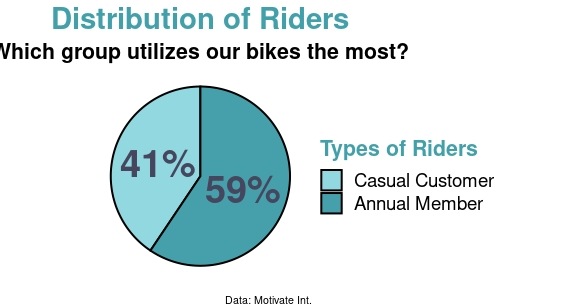

* Among the bikes used, Annual Members utilized them more than Casual Customers.

In [ ]:
# Data viz & analysis on percentage of casual customers and their preferred bike of choice 

total_percent <- sum(casual_member_biketype_used$percent_casual) # Calculate the total percentage

ggplot(casual_member_biketype_used, aes(x = bike, y = percent_casual / total_percent, fill = percent_casual)) + 
  geom_bar(stat = "identity") +
  geom_text(aes(label = scales::percent(percent_casual / total_percent)), vjust = 2, size = 8, fontface = "bold", color = "black") + 
  scale_fill_gradient(high = "#42a0ab", low = "#91d8e0") +
  labs(title = "Percentage of bike-used by casual customers", subtitle = "Casual customers favored electric bikes over the other options ",
       caption = "Data: Motivate International", x = "Types of bikes", y = "") +
  theme_minimal() +
  theme(plot.title = element_text(size = 22, color = "#42a0ab", face = "bold"), 
        plot.subtitle = element_text(size = 16, color = "black", face = "bold"), 
        plot.caption = element_text(size = 8, color = "black"),
        axis.title.x = element_text(size = 15, color = "#42a0ab", face = "bold"),
        axis.title.y = element_blank(),
        axis.text.x = element_text(size = 14, color = "black", face = "bold"),
        axis.text.y = element_blank(),
        legend.position = "none")

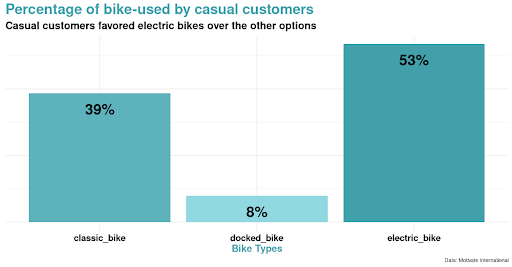

* Casual customers showed a preference for electric bikes the most, with 53% favoring them, followed closely by the classic bike. However, the docked bike saw low usage at only 8%.

In [ ]:
# Percentage of bikes used by annual riders. 

options(repr.plot.width = 8, repr.plot.height = 6)

total_percent <- sum(annual_member_biketype_used$percent_annual)  # Calculate the total percentage

ggplot(annual_member_biketype_used, aes(x = bike, y = percent_annual / total_percent, fill = percent_annual)) +
  geom_bar(stat = "identity") +
  geom_text(aes(label = paste0(round(percent_annual / total_percent * 100), "%")), vjust = 2, size = 8, fontface = "bold", color = "black") +
  scale_fill_gradient(high = "#42a0ab", low = "#91d8e0") +
  labs(
    title = "Percentage of bike-used by annual members",
    subtitle = "Annual members tend to use both electric and classic bikes almost evenly",
    caption = "Data: Motivate Int.",
    x = "Bike Types",
    y = ""
  ) +
  theme_minimal() +
  theme(
    plot.title = element_text(size = 22, color = "#42a0ab", face = "bold"),
    plot.subtitle = element_text(size = 16, color = "black", face = "bold"),
    plot.caption = element_text(size = 8, color = "black"),
    axis.title.x = element_text(size = 15, color = "#42a0ab", face = "bold"),
    axis.title.y = element_blank(),
    axis.text.x = element_text(size = 14, color = "black", face = "bold"),
    axis.text.y = element_blank(),
    legend.position = "none"
  )

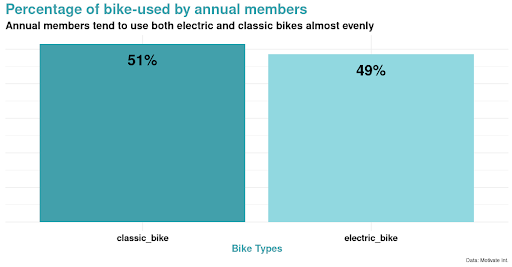

* Annual members had an equal distribution between the classic bike (51%) and electric bike (49%), but the docked bike was not used at all.


In [ ]:
 #rides per hour throughout the day between casuals and members
options(repr.plot.width = 12, repr.plot.height = 8)
options(scipen = 999)

ggplot(hour_usage, aes(hour_of_day, numberofrides, fill = user, group = user)) +
  geom_bar(stat = "identity") +
  scale_fill_manual(values = c("#91d8e0", "#42a0ab"), name = "Types of Riders", breaks = c("casual", "member"), labels = c("Casual Customer", "Annual Member")) +
  labs(
    title = "Rides Throughout the Day",
    subtitle = "Casual customers ride more in comparison to annual members during peak hours",
    caption = "Data: Motivate Int.",
    x = "Hour of the day",
    y = "Number of Rides"
  ) +
  ylim(0, 500000) +  # Set the y-axis limits to 0 and 500,000 (adjust as needed)
  theme_minimal() +
  theme(
    plot.title = element_text(size = 22, color = "#42a0ab", face = "bold"),
    plot.subtitle = element_text(size = 14, color = "black", face = "bold"),
    plot.caption = element_text(size = 8, color = "black"),
    legend.title = element_text(size = 16, face = "bold", color = "#42a0ab"),
    legend.text = element_text(size = 14, color = "black"),
    axis.title.x = element_text(size = 15, color = "#42a0ab", face = "bold"),
    axis.title.y = element_text(size = 15, color = "#42a0ab", face = "bold"),
    axis.text.x = element_text(size = 10, color = "black", face = "bold"),
    axis.text.y = element_text(size = 10, color = "black", face = "bold")
  )

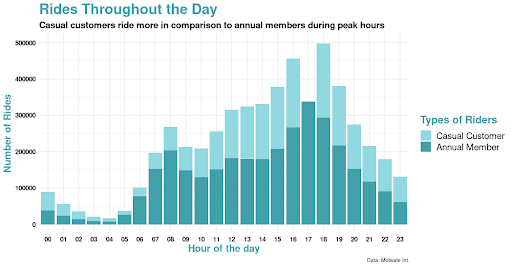

* Peak times tended to occur later in the day, and casual customers rode more frequently than annual members.


In [ ]:
# Rides throughout the week per bike user

options(repr.plot.width = 12, repr.plot.height = 8)
options(scipen = 999)

ggplot(dayofweek, aes(day_of_week, numberofrides, fill = user, group = user)) +
  geom_bar(stat = "identity") +
  scale_fill_manual(values = c("#91d8e0", "#42a0ab"), name = "Types of riders", breaks = c("casual", "member"), labels = c("Casual Customer", "Annual Member")) +
  labs(
    title = "Rides Throughout the Week",
    subtitle = "For annual members, ride frequency remains stable across all days of the week",
    caption = "Data: Motivate Int.",
    x = "Day of the Week",
    y = "Number of Rides"
  ) +
  ylim(0, 800000) +  # Set the desired upper limit of the y-axis
  theme_minimal() +
  theme(
    plot.title = element_text(size = 22, color = "#42a0ab", face = "bold"),
    plot.subtitle = element_text(size = 14, color = "black", face = "bold"),
    plot.caption = element_text(size = 8, color = "black"),
    legend.title = element_text(size = 16, face = "bold", color = "#42a0ab"),
    legend.text = element_text(size = 14, color = "black"),
    axis.title.x = element_text(size = 15, color = "#42a0ab", face = "bold"),
    axis.title.y = element_text(size = 15, color = "#42a0ab", face = "bold"),
    axis.text.x = element_text(size = 10, color = "black", face = "bold"),
    axis.text.y = element_text(size = 10, color = "black", face = "bold")
  )

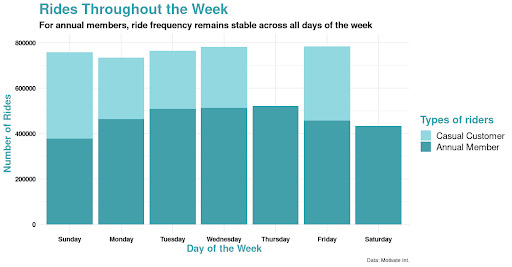

* Throughout the week, rides were consistent, except for Thursday and Saturday, when casual customers tended to ride more often than annual members.

In [ ]:
# The months with the most rides within the the year of 2022.

options(repr.plot.width = 12, repr.plot.height = 8)
options(scipen = 999)

monthly_rides <- trips_22 %>% # the analysis of monthly rides
  group_by(user, month) %>%
  summarize(numberofrides = n(), .groups = "drop")

ggplot(monthly_rides, aes(month, numberofrides, fill = user, group = user)) +
  geom_bar(stat = "identity") +
  scale_fill_manual(
    values = c("#91d8e0", "#42a0ab"),
    name = "Types of riders",
    breaks = c("casual", "member"),
    labels = c("Casual Customer", "Annual Member")
  ) +
  labs(
    title = "Rides Throughout the Year",
    caption = "Data: Motivate Int.",
    subtitle = "During the summer season, there is a surge in the number of rides",
    x = "Month",
    y = "Number of Rides"
  ) +
  theme_minimal() +
  theme(
    plot.title = element_text(size = 22, color = "#42a0ab", face = "bold"),
    plot.subtitle = element_text(size = 14, color = "black", face = "bold"),
    plot.caption = element_text(size = 8, color = "black"),
    legend.title = element_text(size = 16, face = "bold", color = "#42a0ab"),
    legend.text = element_text(size = 14, color = "black"),
    axis.title.x = element_text(size = 15, color = "#42a0ab", face = "bold"),
    axis.title.y = element_text(size = 15, color = "#42a0ab", face = "bold"),
    axis.text.x = element_text(size = 10, color = "black", face = "bold"),
    axis.text.y = element_text(size = 10, color = "black", face = "bold")
  )

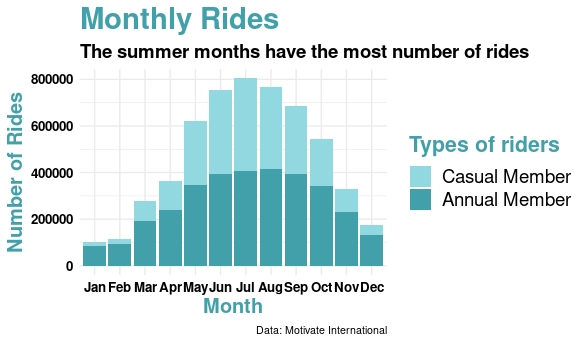

* As the summer months approached, the number of bike rides increased dramatically. Casual customers significantly outpaced annual members in the total rides throughout the year.

#### Conclusion and findinds:

* Among the bikes used, Annual Members utilized them more than Casual Customers.

* Casual customers showed a preference for electric bikes the most, with 53% favoring them, followed closely by the classic bike. However, the docked bike saw low usage at only 8%.

* Annual members had an equal distribution between the classic bike (51%) and electric bike (49%), but the docked bike was not used at all.

* Peak times tended to occur later in the day, and Casual customers rode more frequently than annual members.

* Throughout the week, rides were consistent, except for Thursday and Saturday, when casual customers tended to ride more often than annual members.

* As the summer months approached, the number of bike rides increased dramatically. Casual customers significantly outpaced annual members in the total rides throughout the year.

# 6. Act
Provide actionable insights and recommendations to the stakeholders of Cyclistic and answers the business question:

Based on the anaylsis performed with the data provided, the following recommendations are:

Recommendations: 

1. Establish partnerships with social media influencers to create collaborative content promoting Cyclistic and highlighting the advantages of  using the bikes. By enlisting influencers as brand ambassadors, they can offer exclusive sign-up discounts through their dedicated codes shared in their social media posts.

2. Given the significant increase in ride numbers during the summer months for all riders, it is recommended to implement a targeted promotion for annual membership sign-ups ahead of the summer season. This strategy aims to specifically engage casual customers and encourage their conversion into annual members.

3. Conduct comprehensive research to investigate the low utilization of docked bikes among both single-day use customers and annual members. The objective is to gain a deeper understanding of the factors contributing to the underutilization and identify potential strategies for improving the usage of docked bikes among these customer segments.